In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import zipcodes as zcode

In [2]:
df= pd.read_csv('Loan_Modelling.csv')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


1. To find out the Potential Customer
2. Which variables/features are most significant
3. Which segment of customers should be targeted more

In [6]:
df.drop('ID',axis=1,inplace=True)

In [7]:
df.sample(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
371,58,34,19,92029,4,0.7,1,0,0,0,0,0,0
3817,65,40,140,92093,1,0.9,1,0,0,0,0,0,0
2680,60,30,31,95060,1,1.5,3,0,0,0,0,1,0
154,54,29,58,92612,4,1.3,3,0,0,0,0,0,0
316,57,31,165,95054,1,1.6,2,0,1,0,0,1,0


In [8]:
print('Number of unique values:\n------------------------------\n',df.nunique(),sep='')

Number of unique values:
------------------------------
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64


In [9]:
print('Unique Data for all\n')
for c in df.columns:
    print(c,df[c].unique(),'',sep='\n-----------------\n')

Unique Data for all

Age
-----------------
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
-----------------

Experience
-----------------
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
-----------------

Income
-----------------
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102

In [10]:
cat_cols = ['Family','Education','Securities_Account','CD_Account','Online','CreditCard','Personal_Loan']
cont_cols = ['Age','Experience','Income','CCAvg','Mortgage']

### Preprocessing

In [11]:
# viewing the negative experience values
df[df['Experience']<0]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [12]:
df[df['Experience']<0].groupby(['Age','Education'])['Experience'].count()

Age  Education
23   1             7
     2             5
24   1             5
     2             6
     3             6
25   1             4
     2             4
     3            10
26   2             1
28   3             1
29   3             3
Name: Experience, dtype: int64

In [13]:
import numpy as np

In [14]:
# working on zipcodes

In [15]:
zcode.matching('92691')

[{'zip_code': '92691',
  'zip_code_type': 'STANDARD',
  'active': True,
  'city': 'Mission Viejo',
  'acceptable_cities': ['San Juan Capistrano', 'San Juan Capo'],
  'unacceptable_cities': [],
  'state': 'CA',
  'county': 'Orange County',
  'timezone': 'America/Los_Angeles',
  'area_codes': ['714', '949'],
  'world_region': 'NA',
  'country': 'US',
  'lat': '33.6042',
  'long': '-117.6677'}]

In [16]:
zcode.matching('90065')[0].get('county')

'Los Angeles County'

In [17]:
df['County'] = df['ZIPCode'].apply(lambda x: zcode.matching(str(x))[0].get('county') if len(zcode.matching(str(x))) else str(x))

In [18]:
df['County'].nunique()

42

In [19]:
df.sample(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
2427,29,5,34,92675,4,0.4,2,0,0,0,0,1,0,Orange County
3508,33,9,125,92182,1,4.3,3,0,1,0,0,1,0,San Diego County
3820,32,7,61,94102,3,2.3,1,205,0,0,0,1,1,San Francisco County
1334,47,22,35,94304,2,1.3,1,0,0,0,0,1,0,Santa Clara County
1585,57,31,131,90502,2,2.7,1,0,0,0,0,0,0,Los Angeles County


### EDA

In [20]:
for col in cat_cols:
    print('Feature:',col)
    print(df[col].value_counts().sort_index())
    print()
    print('#'*20)
    print()

Feature: Family
1    1472
2    1296
3    1010
4    1222
Name: Family, dtype: int64

####################

Feature: Education
1    2096
2    1403
3    1501
Name: Education, dtype: int64

####################

Feature: Securities_Account
0    4478
1     522
Name: Securities_Account, dtype: int64

####################

Feature: CD_Account
0    4698
1     302
Name: CD_Account, dtype: int64

####################

Feature: Online
0    2016
1    2984
Name: Online, dtype: int64

####################

Feature: CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64

####################

Feature: Personal_Loan
0    4520
1     480
Name: Personal_Loan, dtype: int64

####################



In [21]:
print(round(df['Personal_Loan'].value_counts()/len(df)*100,2))

0    90.4
1     9.6
Name: Personal_Loan, dtype: float64


In [22]:
import seaborn as sns

In [23]:
def plot_pie_count(col, r,c,n):
    plt.subplot(r,c,n)
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.subplot(r,c,n+1)
    sns.countplot(x=col, data=df, hue='Personal_Loan')

In [24]:
len(cat_cols)

7

In [25]:
cat_cols

['Family',
 'Education',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard',
 'Personal_Loan']

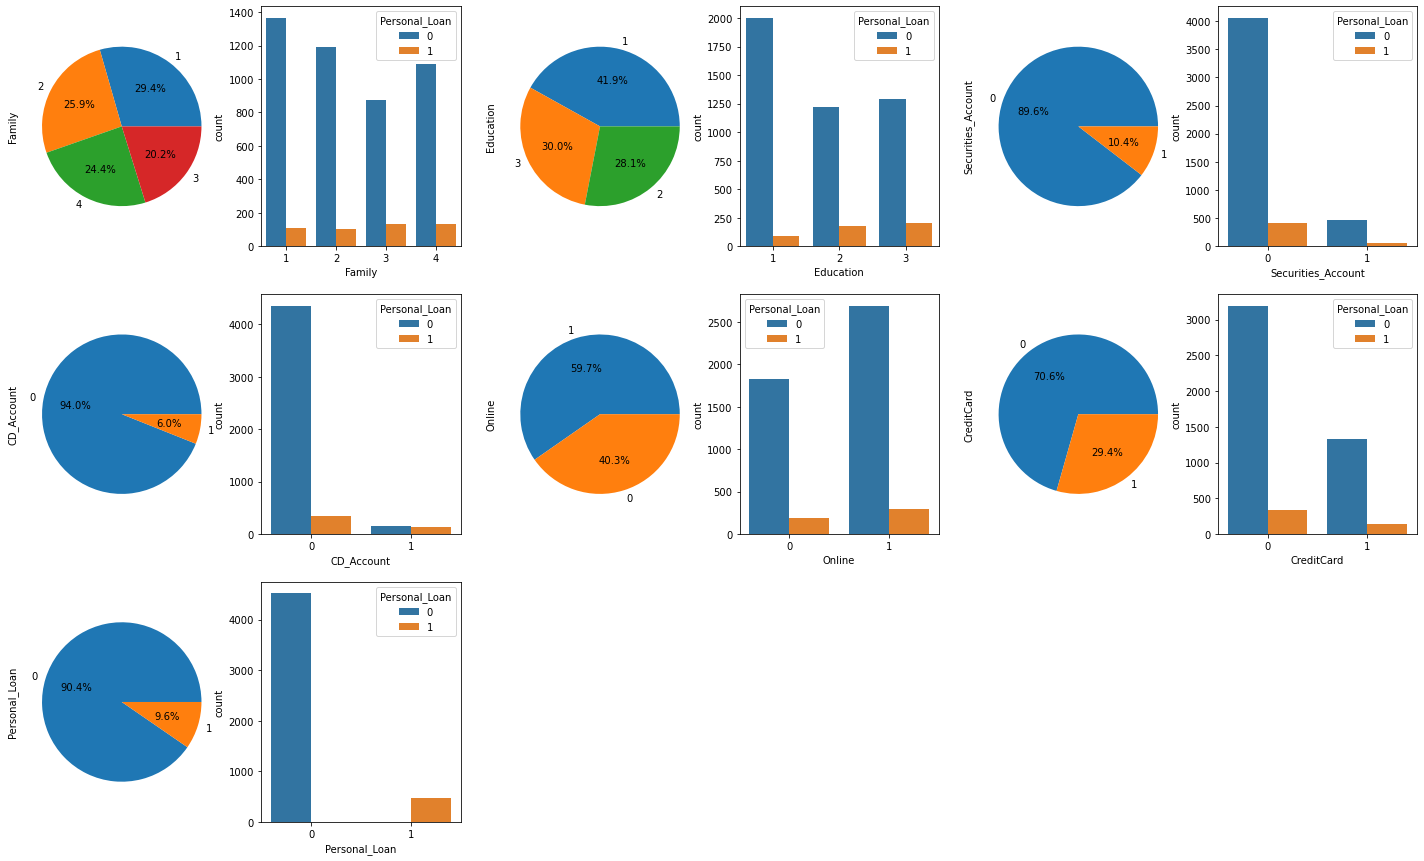

In [26]:
plt.figure(figsize=(25,15))
for i,c in enumerate(cat_cols):
    plot_pie_count(c,3,6,(i*2)+1)

In [27]:
def plot_dist(col,r,c,p):
    clr = ['orange','blue']
    for i in range(2):
        plt.subplot(r,c,p+i)
        mean = df[col][df['Personal_Loan']==i].mean()
        median = df[col][df['Personal_Loan']==i].median()
        mode = df[col][df['Personal_Loan']==i].mode().tolist()[0]
        plt.axvline(mean, color='r', linestyle='--', linewidth=2)
        plt.axvline(median, color='b', linestyle='-', linewidth=2)
        plt.axvline(mode, color='g', linestyle='-.', linewidth=2)
        sns.histplot(df[col][df['Personal_Loan']==i], bins=20, color=clr[i])
        plt.legend({'Mean %.1f'%mean:mean, 'Median %.1f'%median : median, 'Mode %.1f'%mode : mode})
        plt.title(col+' & Personal Loan ={}'.format(i))

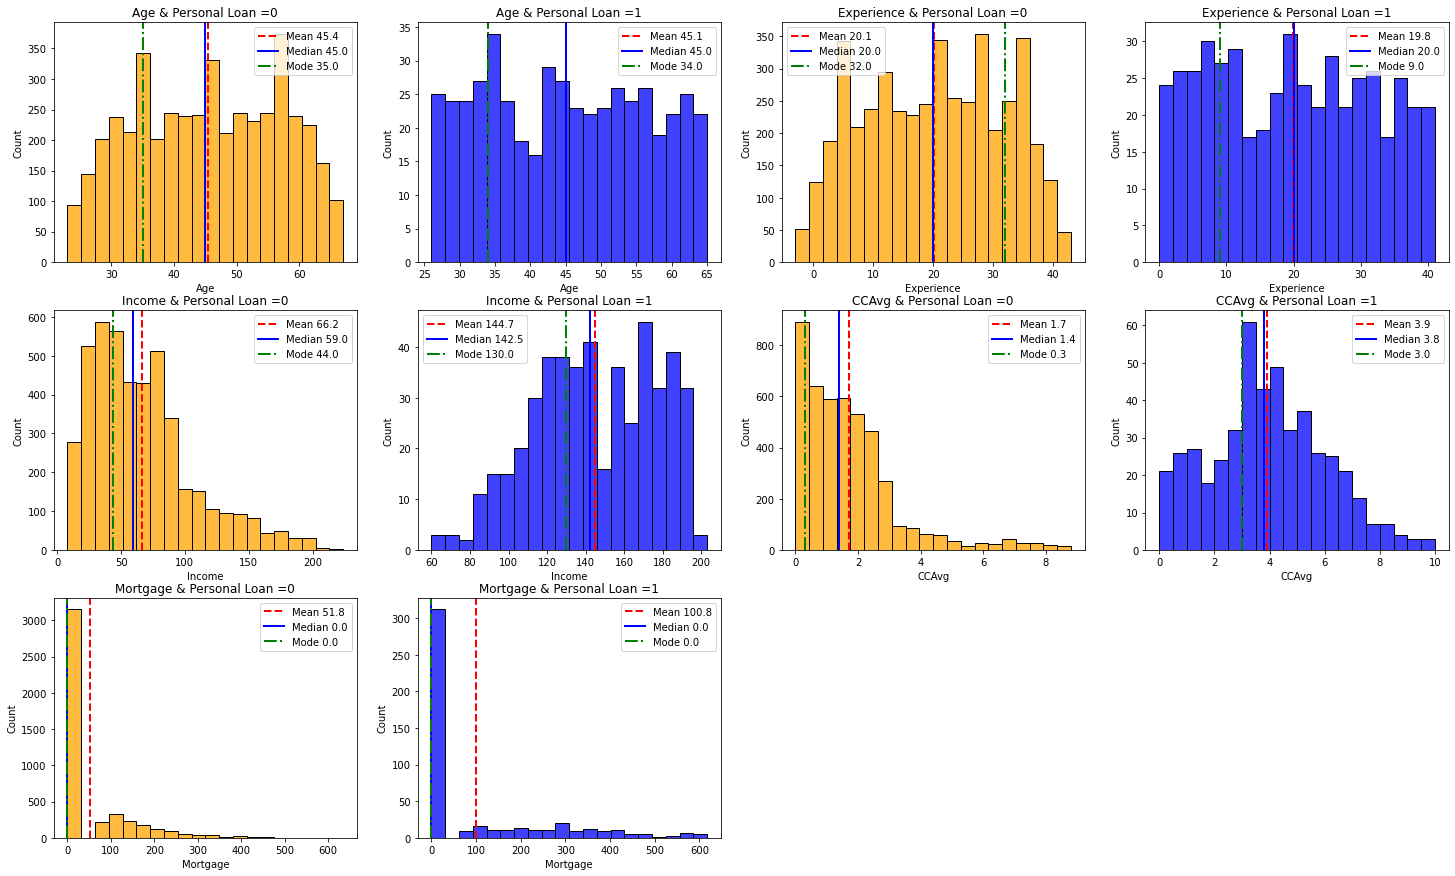

In [28]:
plt.figure(figsize=(25,15))
for i,c in enumerate(cont_cols):    
    plot_dist(c,3,4,(i*2)+1)

In [29]:
df['County'] = df['County'].apply(lambda x:x.replace(' County',''))

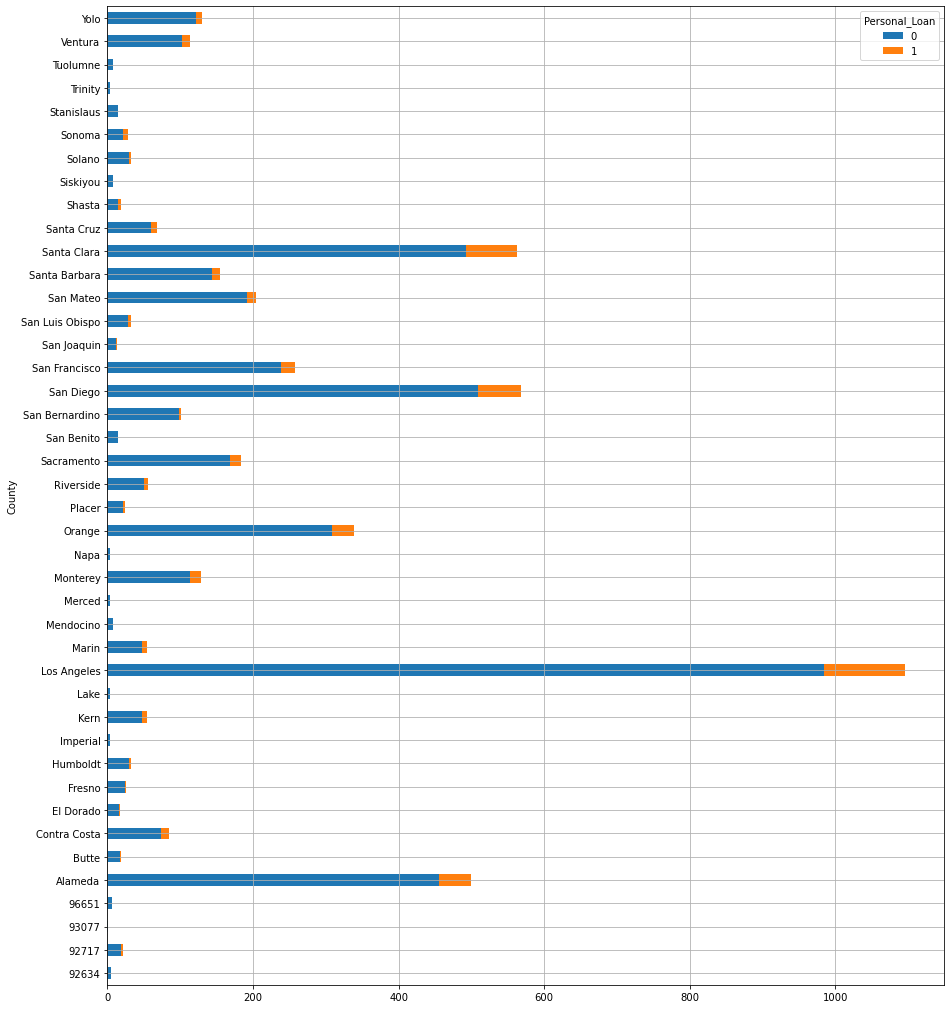

In [30]:
# plt.figure(figsize=(15,25))
pd.crosstab(index=df['County'], columns=df['Personal_Loan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(15,18))
plt.grid()

In [31]:
c200 = df['County'].value_counts().index[df['County'].value_counts()>200]
c200

Index(['Los Angeles', 'San Diego', 'Santa Clara', 'Alameda', 'Orange',
       'San Francisco', 'San Mateo'],
      dtype='object')

In [32]:
df['CountyGroup'] = df['County'].apply(lambda x: x if x in c200 else 'Other')

In [33]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,CountyGroup
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles,Los Angeles
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles,Los Angeles
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda,Alameda
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco,San Francisco
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles,Los Angeles


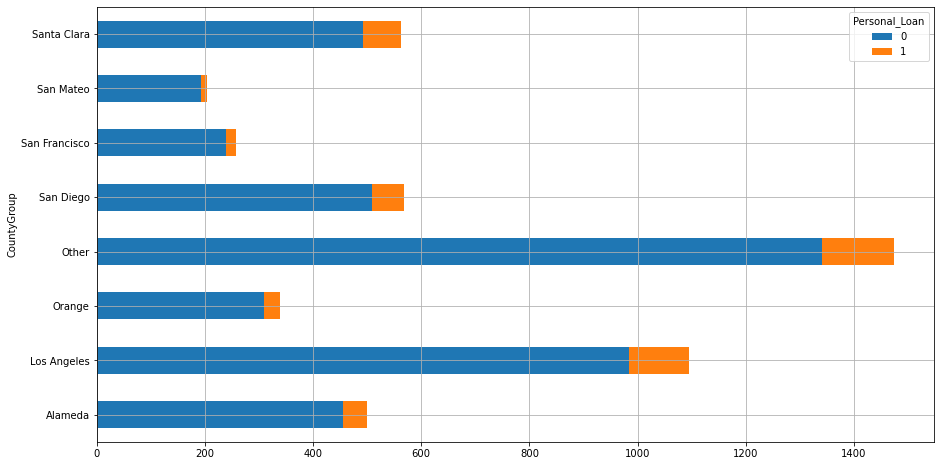

In [34]:
pd.crosstab(index=df['CountyGroup'], columns=df['Personal_Loan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(15,8))
plt.grid()

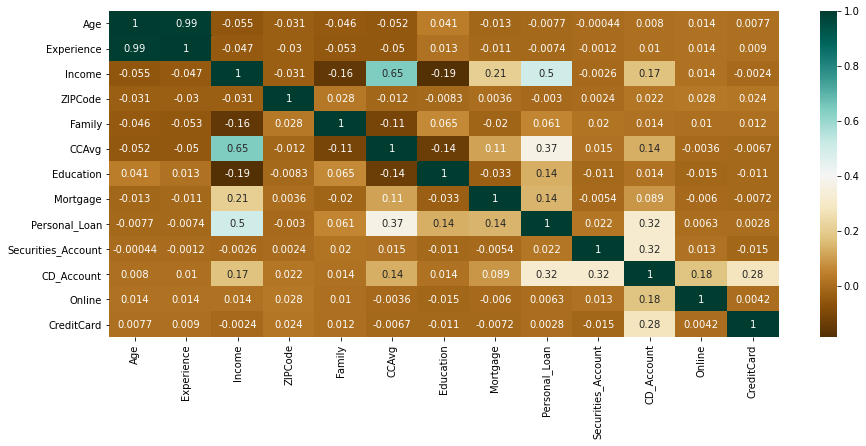

In [35]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap='BrBG',annot=True)

##### OutliersDetection & Removal

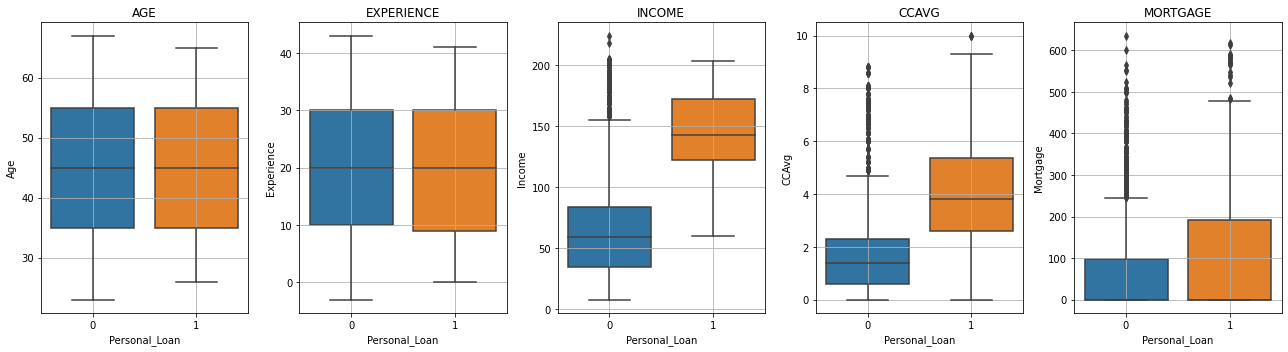

In [36]:
plt.figure(figsize=(18,5))
for i,c in enumerate(cont_cols):
    plt.subplot(1,5,i+1)
    sns.boxplot(x='Personal_Loan',y=c, data=df)
#     plt.boxplot(df[c],whis=1.5)
    plt.tight_layout()
    plt.title(c.upper())
    plt.grid()

In [37]:
income = df['Income'].copy()

In [38]:
import warnings
warnings.filterwarnings('ignore')

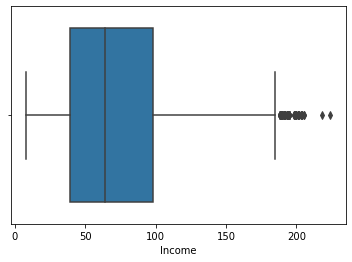

In [39]:
sns.boxplot(income)

In [40]:
Q1 = income.quantile(0.25)
Q3 = income.quantile(0.75)
IQR = Q3-Q1
print('IQR is:',IQR)

IQR is: 59.0


In [41]:
Q1

39.0

In [42]:
first_q = Q1-1.5*IQR
third_q = Q3+1.5*IQR
print(first_q)
print(third_q)

-49.5
186.5


In [43]:
income1 = income[(income<=third_q)&(income>=first_q)]

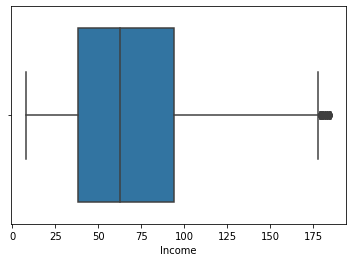

In [44]:
sns.boxplot(income1)

In [45]:
sum((income<=third_q)&(income>=first_q))

4904

### Prepare the Data for Training

In [46]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'County', 'CountyGroup'],
      dtype='object')

In [47]:
x = df[['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities_Account','CD_Account','Online','CreditCard']]
y = df['Personal_Loan']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
xtrain,xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25, random_state=101)

### Machine Learning

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [51]:
model_log = LogisticRegression().fit(xtrain,ytrain)
model_dt = DecisionTreeClassifier().fit(xtrain,ytrain)
model_rf = RandomForestClassifier().fit(xtrain,ytrain)
model_svc = SVC().fit(xtrain,ytrain)

In [52]:
model_log.score(xtest,ytest)

0.9448

In [53]:
model_dt.score(xtest,ytest)

0.98

In [54]:
model_rf.score(xtest,ytest)

0.9864

In [55]:
model_svc.score(xtest,ytest)

0.9144

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import scipy.stats as stats
import statsmodels.api as sm

In [62]:
from sklearn.model_selection import GridSearchCV

In [60]:
pd.DataFrame(model_log.coef_, index=['Coefficient'],columns=x.columns).T

,Coefficient
Age,-0.489065
Experience,0.487918
Income,0.050265
Family,0.666452
CCAvg,0.083024
Education,1.598608
Mortgage,0.000926
Securities_Account,0.260919
CD_Account,2.860832
Online,-0.583027


In [68]:
sns.set_style('whitegrid')

In [86]:
def performance(xt, yt, model):
    yp = model.predict(xt)
    print('Classification Report')
    print('-'*30)
    print('R2-Score:',model.score(xt,yt))
    print(classification_report(yt,yp))
    print('-'*30)
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.heatmap(pd.DataFrame(confusion_matrix(yt,yp),index=['No','Yes'],columns=['No','Yes']),annot=True,fmt='d')
    plt.title('Confusion Matrix')
    rocAuc = roc_auc_score(yt, yp)
    fpr,tpr,th = roc_curve(yt, yp)
    plt.subplot(1,2,2)
    plt.plot(fpr,tpr, label = 'Model (area=%0.2f)'%rocAuc)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')
    plt.show()

Classification Report
------------------------------
R2-Score: 0.9448
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1137
           1       0.81      0.51      0.63       113

    accuracy                           0.94      1250
   macro avg       0.88      0.75      0.80      1250
weighted avg       0.94      0.94      0.94      1250

------------------------------


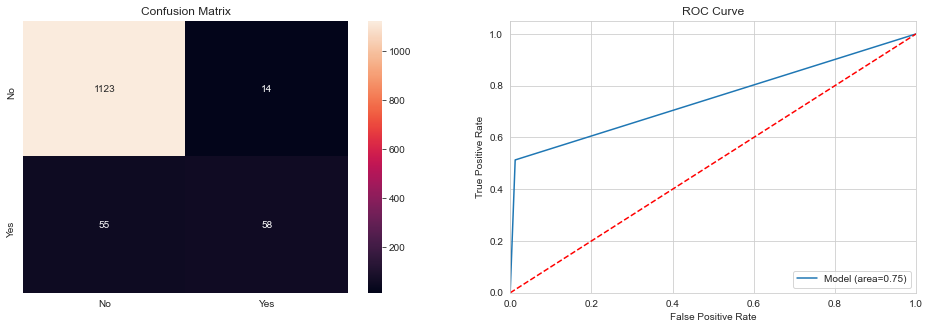

In [87]:
performance(xtest,ytest, model_log)

Classification Report
------------------------------
R2-Score: 0.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1137
           1       0.89      0.88      0.89       113

    accuracy                           0.98      1250
   macro avg       0.94      0.94      0.94      1250
weighted avg       0.98      0.98      0.98      1250

------------------------------


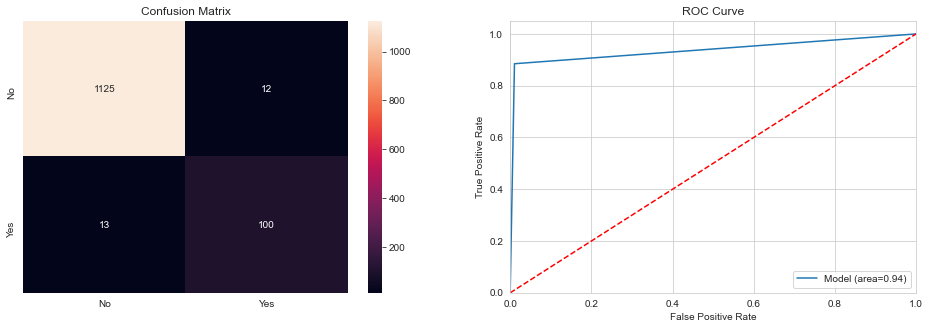

In [88]:
performance(xtest,ytest, model_dt)

Classification Report
------------------------------
R2-Score: 0.9864
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1137
           1       1.00      0.85      0.92       113

    accuracy                           0.99      1250
   macro avg       0.99      0.92      0.96      1250
weighted avg       0.99      0.99      0.99      1250

------------------------------


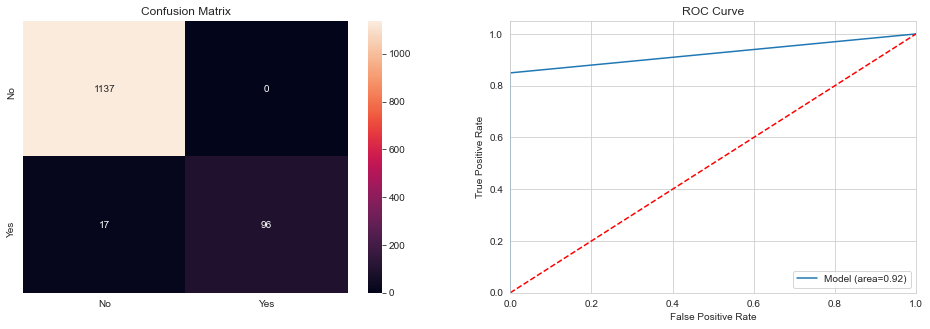

In [89]:
performance(xtest,ytest, model_rf)

Classification Report
------------------------------
R2-Score: 0.9144
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1137
           1       0.67      0.11      0.18       113

    accuracy                           0.91      1250
   macro avg       0.79      0.55      0.57      1250
weighted avg       0.90      0.91      0.89      1250

------------------------------


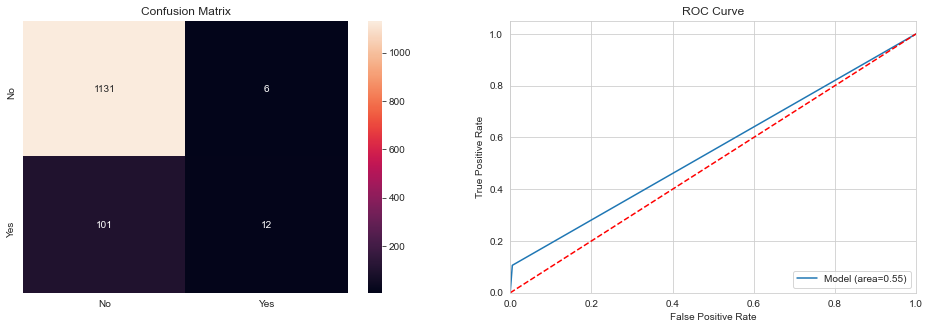

In [90]:
performance(xtest,ytest, model_svc)

### Improving the performance of the Models

Classification Report
------------------------------
R2-Score: 0.9528
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1137
           1       0.82      0.61      0.70       113

    accuracy                           0.95      1250
   macro avg       0.89      0.80      0.84      1250
weighted avg       0.95      0.95      0.95      1250

------------------------------


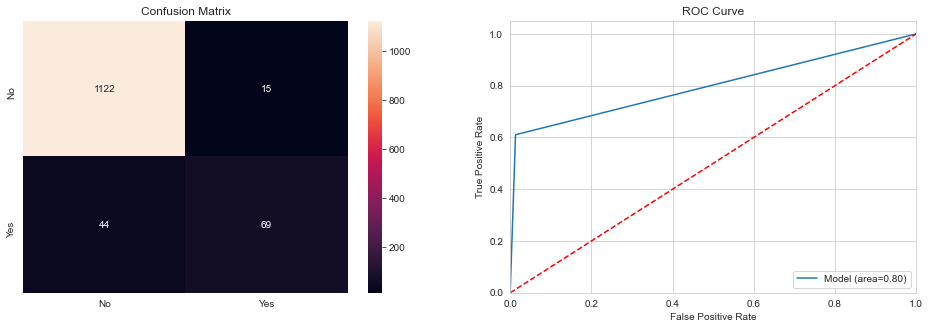

In [98]:
model_log1 = LogisticRegression(solver='newton-cg',random_state=101,class_weight={0:0.5, 1:0.75}).fit(xtrain,ytrain)
performance(xtest,ytest,model_log1)

In [100]:
params = {'solver':['lbfgs','newton-cg'],'class_weight':[{0:0.5, 1:0.75}, {0:0.5, 1:0.5}, {0:0.2, 1:0.8},{0:0.8, 1:0.8},{0:0.9, 1:0.1},{0:0.1, 1:0.9}] }

In [101]:
gcv_legit = GridSearchCV(LogisticRegression(),param_grid=params,verbose=3).fit(xtrain,ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.941, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.956, total=   0.2s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.935, total=   0.2s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.952, total=   0.2s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.945, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.945, total=   0.3s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.959, total=   0.3s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.941, total=   0.3s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.949, total=   0.3s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.949, total=   0.4s
[

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   14.8s finished


In [102]:
gcv_legit.best_params_

{'class_weight': {0: 0.8, 1: 0.8}, 'solver': 'newton-cg'}

Classification Report
------------------------------
R2-Score: 0.9528
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1137
           1       0.86      0.57      0.68       113

    accuracy                           0.95      1250
   macro avg       0.91      0.78      0.83      1250
weighted avg       0.95      0.95      0.95      1250

------------------------------


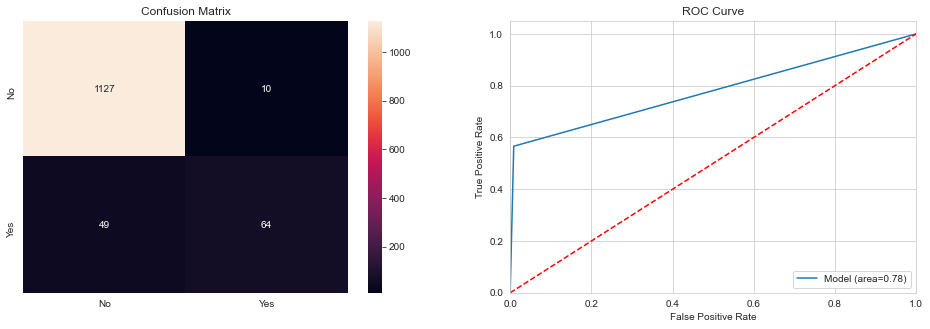

In [103]:
performance(xtest,ytest,gcv_legit.best_estimator_)

In [104]:
pd.DataFrame(gcv_legit.best_estimator_.coef_, index=['Coefficient'],columns=x.columns).T

,Coefficient
Age,-0.079742
Experience,0.089982
Income,0.051790
Family,0.685185
CCAvg,0.121470
Education,1.634057
Mortgage,0.000828
Securities_Account,-0.659308
CD_Account,3.427122
Online,-0.676103


###### dropping the columns, which are less relavent

In [105]:
xtrain.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [106]:
xtrain1 = xtrain.drop(['Age','Experience','Family','Securities_Account','Online', 'CreditCard'],axis=1)
xtest1 = xtest.drop(['Age','Experience','Family','Securities_Account','Online', 'CreditCard'],axis=1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.937, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.956, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.923, total=   0.2s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s



[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.948, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.944, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.937, total=   0.2s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.956, total=   0.2s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.923, total=   0.2s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.948, total=   0.2s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   10.3s finished


Classification Report
------------------------------
R2-Score: 0.9496
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1137
           1       0.85      0.54      0.66       113

    accuracy                           0.95      1250
   macro avg       0.90      0.77      0.82      1250
weighted avg       0.95      0.95      0.94      1250

------------------------------


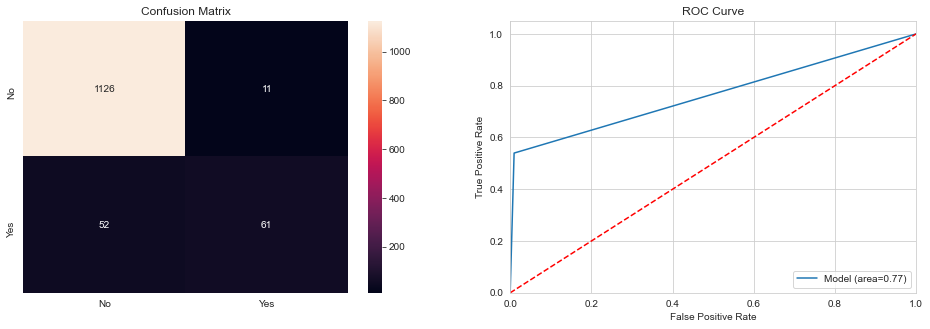

In [107]:
gcv_legit1 = GridSearchCV(LogisticRegression(),param_grid=params,verbose=3).fit(xtrain1,ytrain)


Classification Report
------------------------------
R2-Score: 0.9496
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1137
           1       0.85      0.54      0.66       113

    accuracy                           0.95      1250
   macro avg       0.90      0.77      0.82      1250
weighted avg       0.95      0.95      0.94      1250

------------------------------


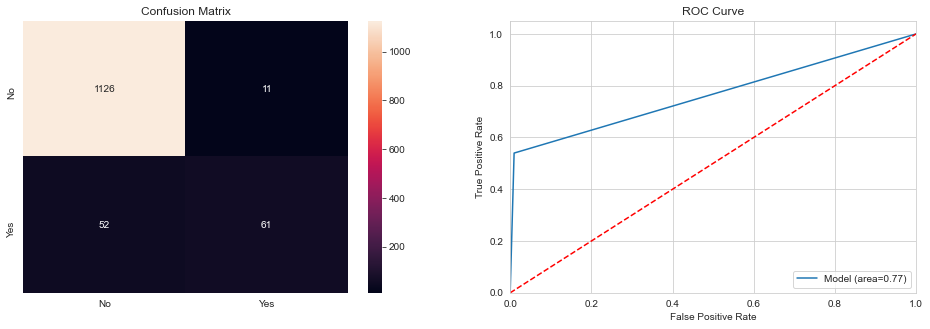

In [108]:
performance(xtest1,ytest,gcv_legit1.best_estimator_)